# PastureBase Ireland

<https://pasturebase.teagasc.ie>

Hanrahan, L., Geoghegan, A., O'Donovan, M., Griffith, V., Ruelle, E.,
Wallace, M. and Shalloo, L. (2017). 'PastureBase Ireland: A grassland
decision support system and national database',
*Computers and Electronics in Agriculture*, vol. 136, pp. 193–201.
DOI: [10.1016/j.compag.2017.01.029][Hanrahan].

[Hanrahan]: https://doi.org/10.1016/j.compag.2017.01.029

In [1]:
import os
from datetime import datetime, timezone
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
print("Last updated:", datetime.now(tz=timezone.utc))

Last updated: 2022-10-16 00:17:30.149144+00:00


In [3]:
DATA_DIR = os.path.join(
    "data", "grass-growth", "pasturebase", "GrowthRateAveragebyWeek.csv"
)

In [4]:
grass_ie = pd.read_csv(DATA_DIR)

In [5]:
grass_ie.shape

(12455, 5)

In [6]:
list(grass_ie)

['Name', 'Counties_CountyID', 'Year', 'WeekNo', 'AvgGrowth']

In [7]:
grass_ie.sort_values(by=["Name", "Year", "WeekNo"], inplace=True)

In [8]:
# convert year and week number to timestamp
# (Monday as the first day of the week)
grass_ie["Timestamp"] = grass_ie.apply(
    lambda row: datetime.strptime(
        str(row.Year) + "-" + str(row.WeekNo) + "-1", "%G-%V-%u"
    ),
    axis=1
)

In [9]:
# create time series using counties as individual columns
grass_ts = grass_ie.drop(columns=["Counties_CountyID", "Year", "WeekNo"])

In [10]:
grass_ts = pd.pivot_table(
    grass_ts, values="AvgGrowth", index=["Timestamp"], columns=["Name"]
)

In [11]:
grass_ts.shape

(508, 30)

In [12]:
grass_ts["time"] = grass_ts.index

In [13]:
grass_ts.sort_values(by=["time"], inplace=True)

In [14]:
# use weekly time series starting on Monday to fill missing rows
grass_time = pd.DataFrame(
    pd.date_range(
        str(grass_ts["time"][0].year) + "-01-01",
        str(grass_ts["time"][len(grass_ts) - 1].year) + "-12-31",
        freq="W-MON"
    ),
    columns=["time"]
)

In [15]:
grass_ts = pd.merge(grass_time, grass_ts, how="outer")

In [16]:
grass_ts.index = grass_ts["time"]

In [17]:
grass_ts.drop(columns=["time"], inplace=True)

In [18]:
grass_ts.shape

(574, 30)

In [19]:
grass_ts.to_csv(
    os.path.join("data", "grass-growth", "pasturebase", "pasturebase.csv")
)

In [20]:
# new colour map
# https://stackoverflow.com/a/31052741
# sample the colormaps that you want to use. Use 15 from each so we get 30
# colors in total
colors1 = plt.cm.tab20b(np.linspace(0., 1, 15))
colors2 = plt.cm.tab20c(np.linspace(0, 1, 15))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))

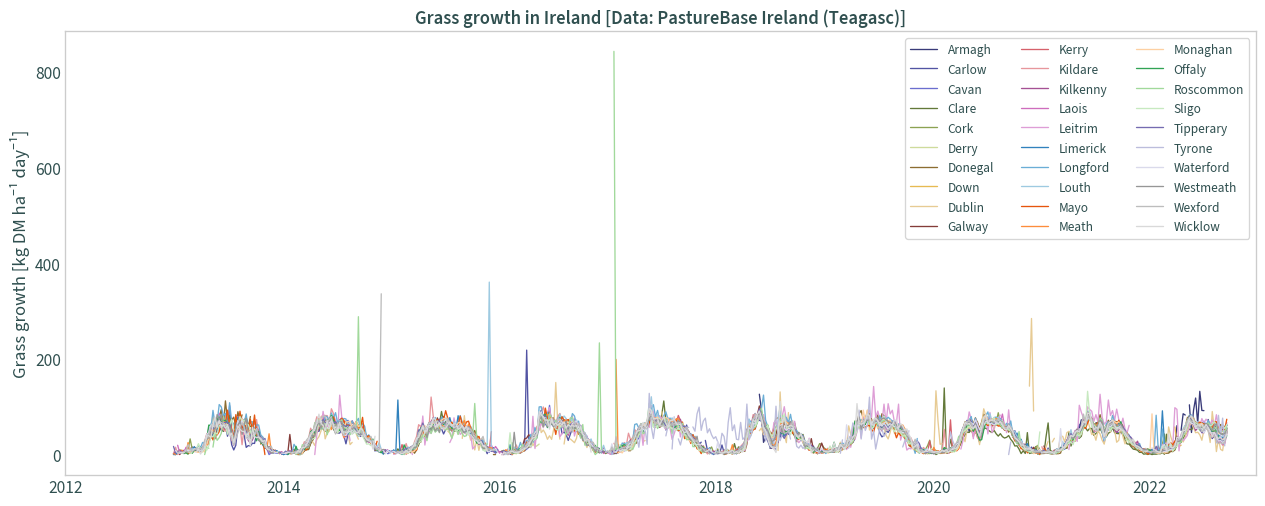

In [29]:
grass_ts.plot(
    figsize=(16, 6), linewidth=1, cmap=mcolors.ListedColormap(colors)
)
plt.title("Grass growth in Ireland [Data: PastureBase Ireland (Teagasc)]")
plt.xlabel("")
plt.ylabel("Grass growth [kg DM ha⁻¹ day⁻¹]")
plt.legend(ncol=3)
plt.show()

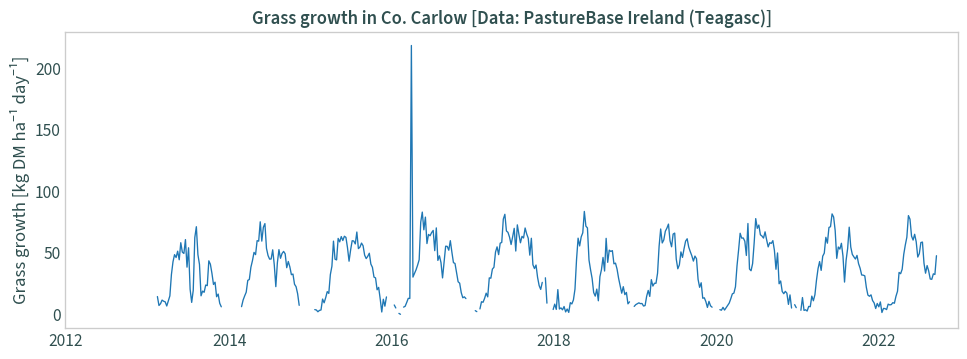

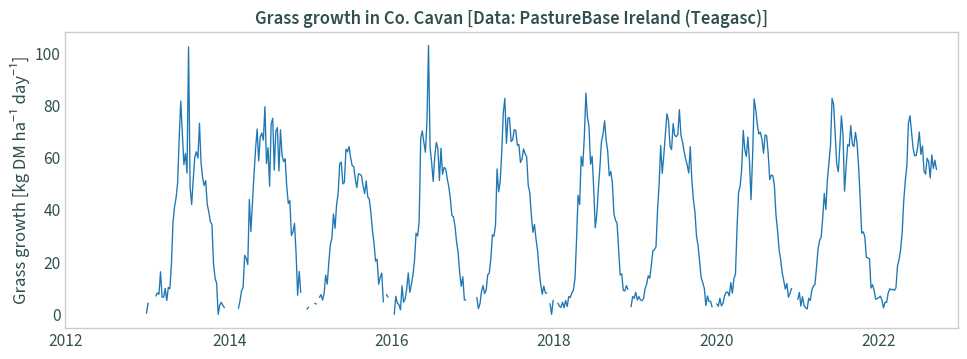

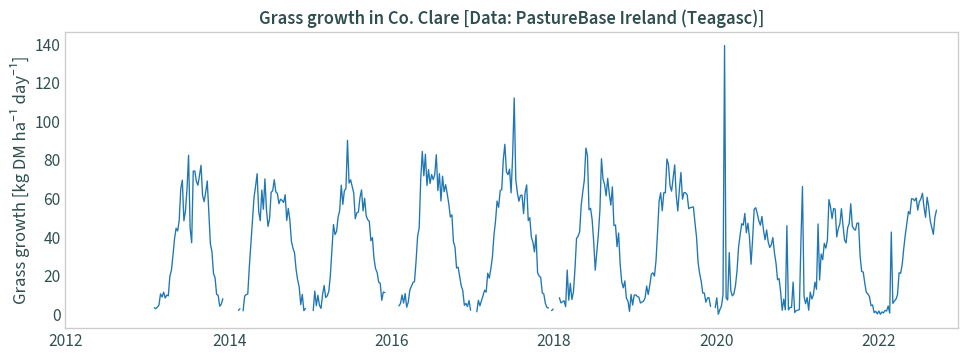

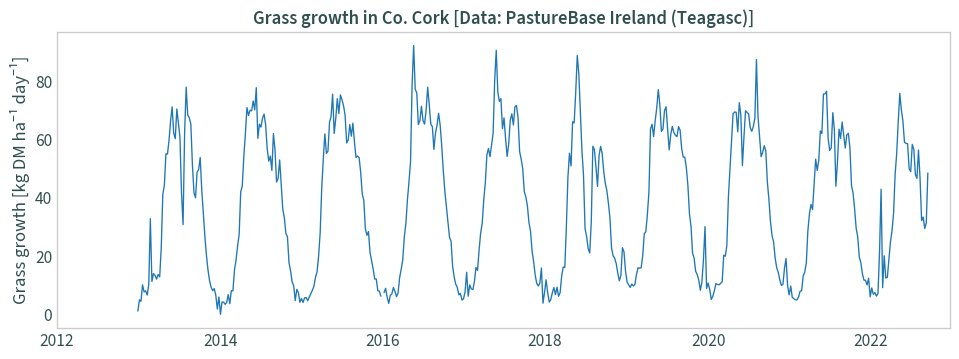

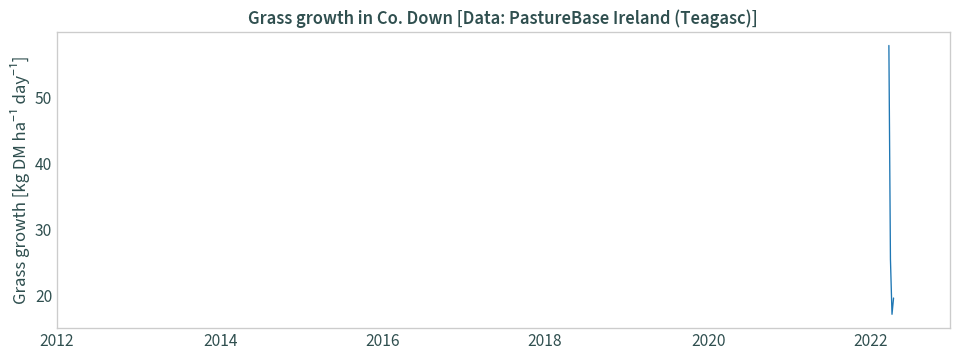

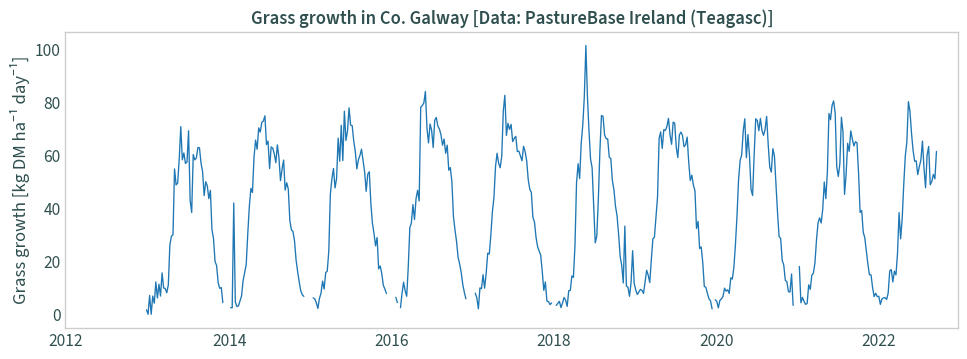

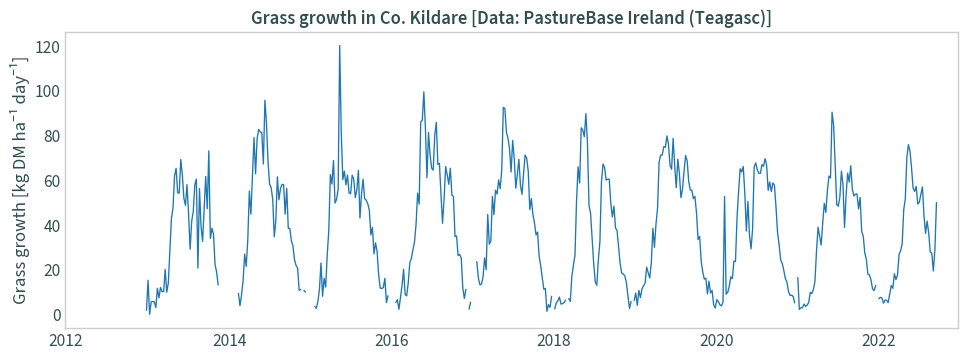

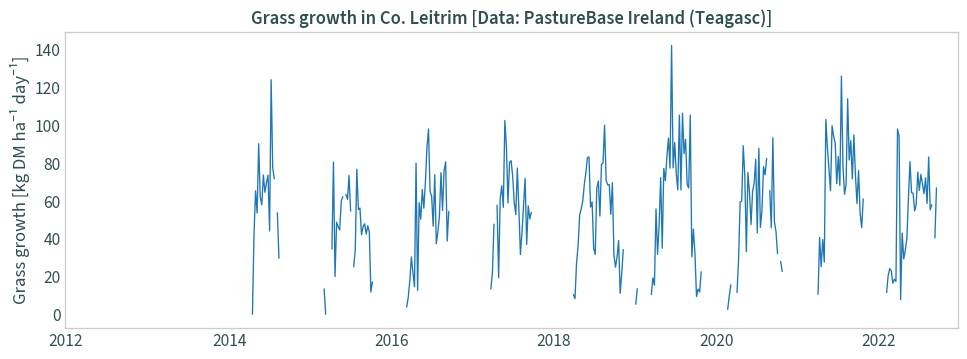

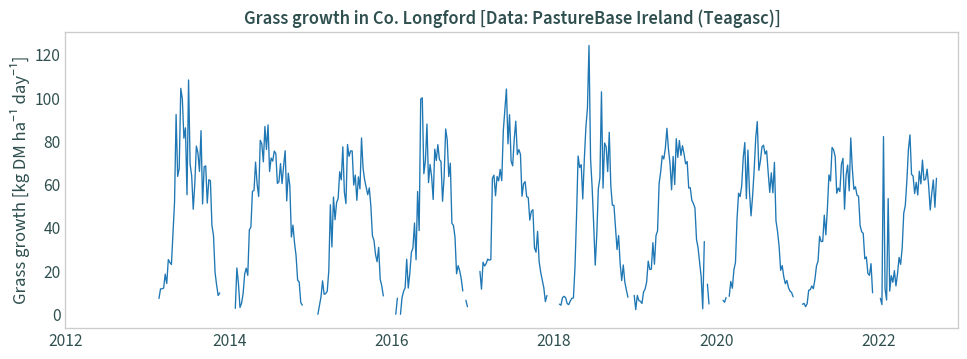

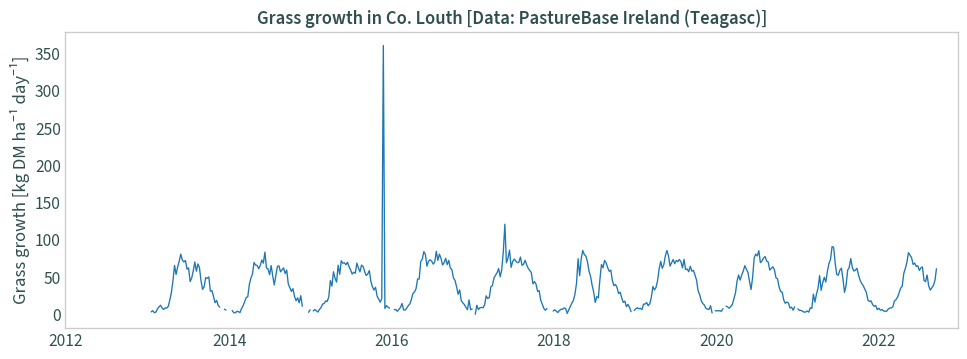

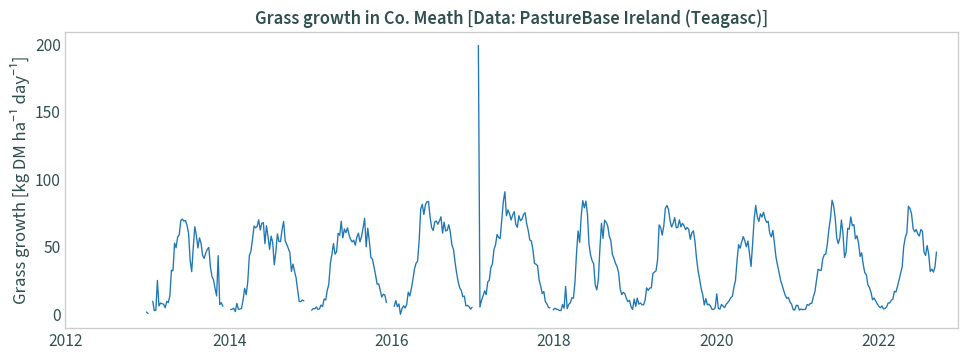

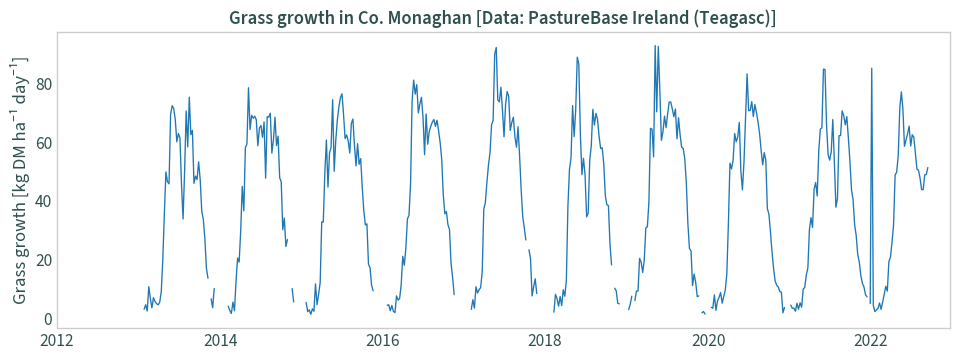

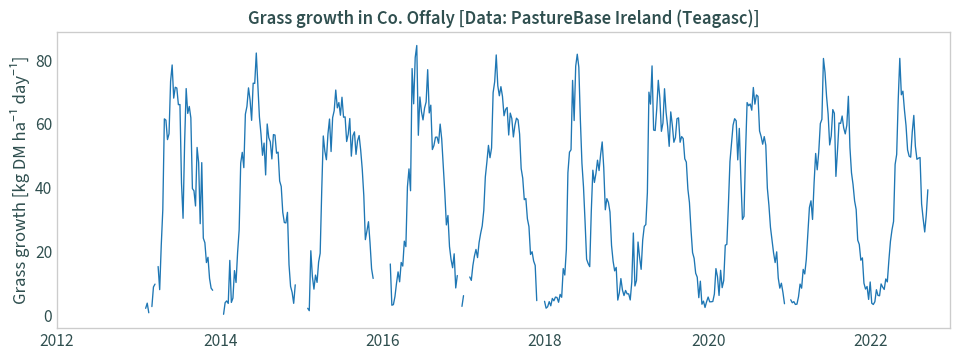

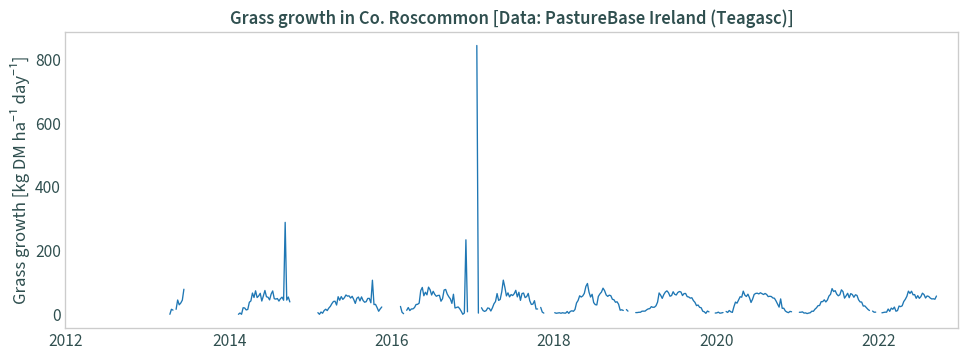

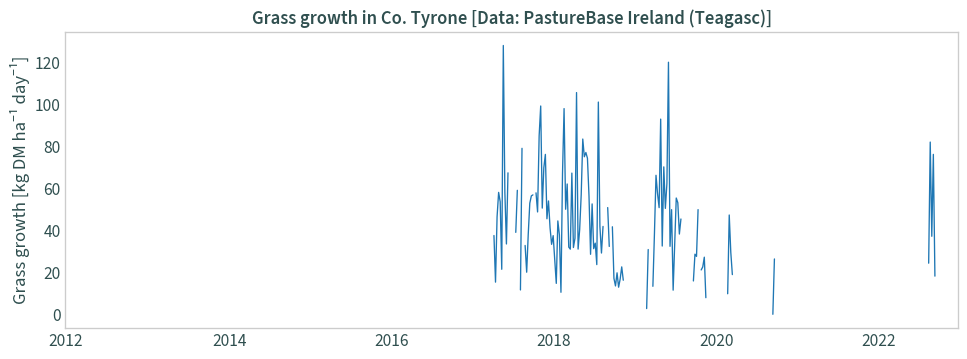

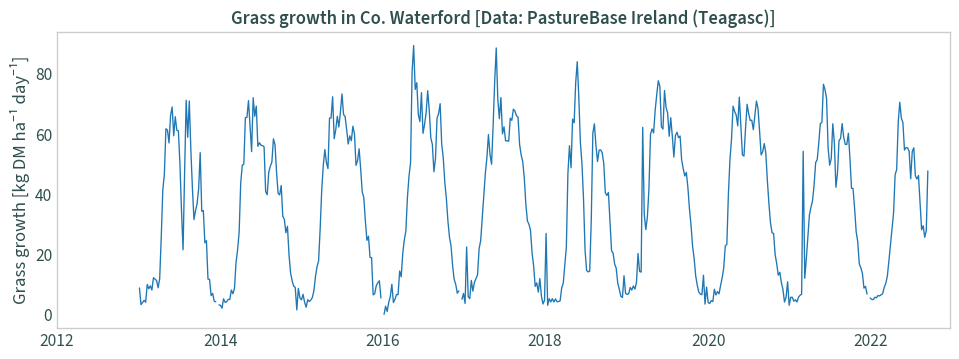

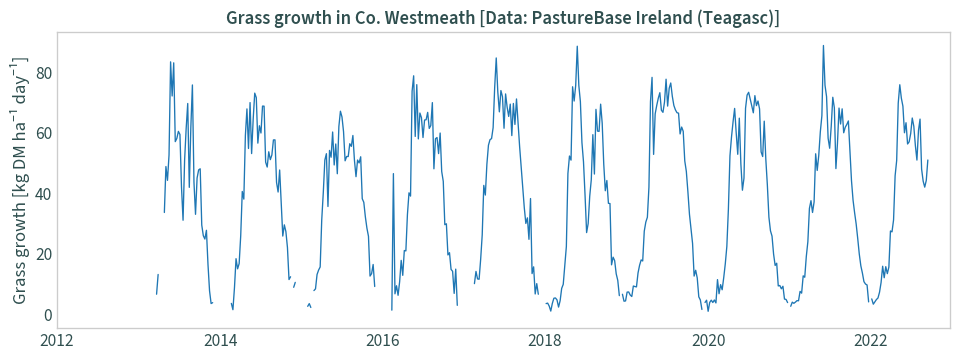

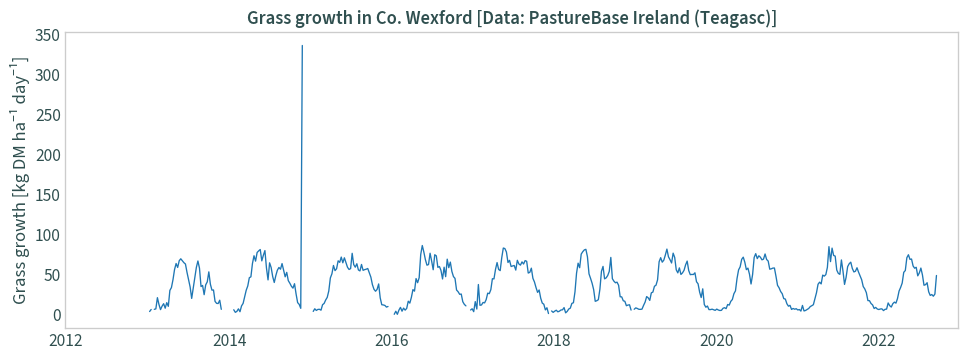

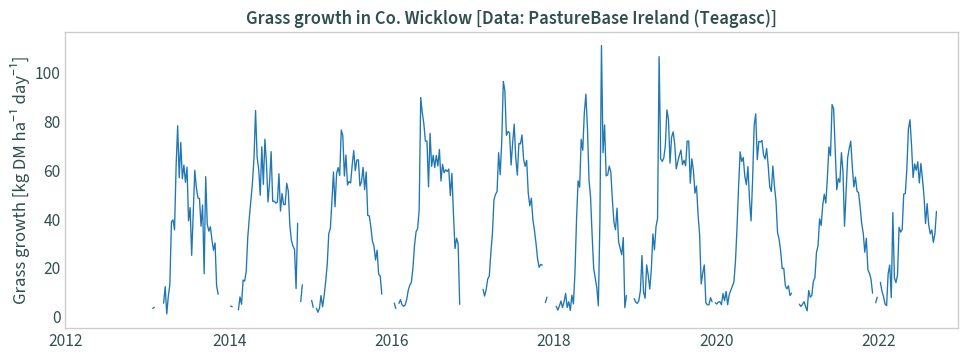

In [28]:
for c in list(grass_ts):
    grass_ts[c].plot(figsize=(12, 4), linewidth=1)
    plt.title(
        f"Grass growth in Co. {c} [Data: PastureBase Ireland (Teagasc)]"
    )
    plt.xlabel("")
    plt.ylabel("Grass growth [kg DM ha⁻¹ day⁻¹]")
    plt.show()

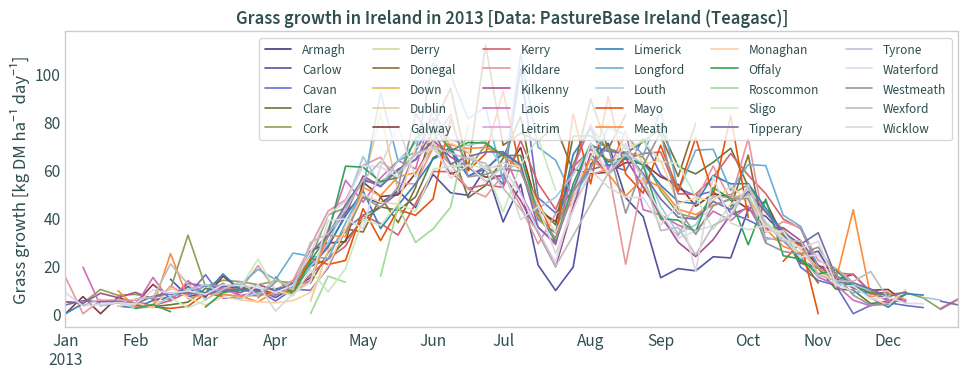

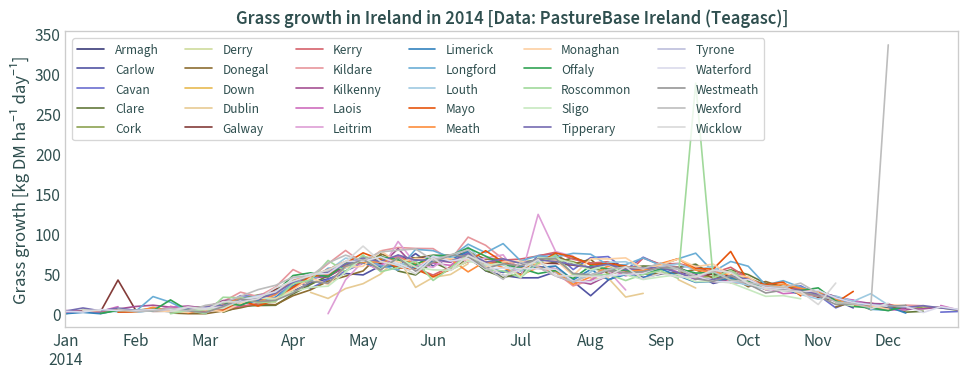

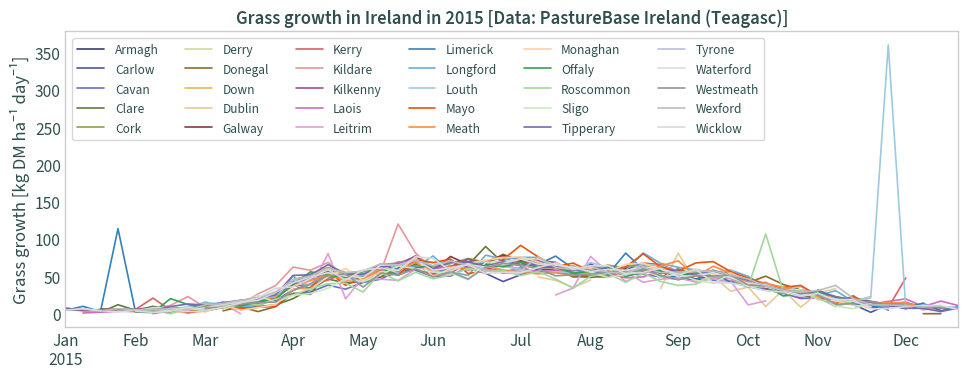

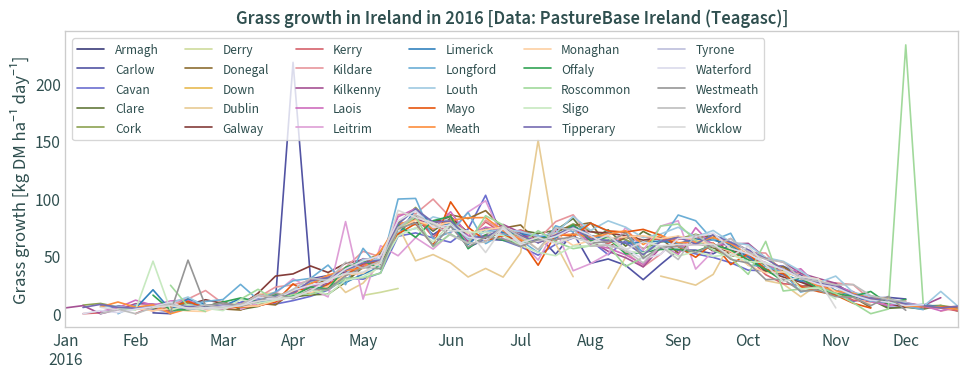

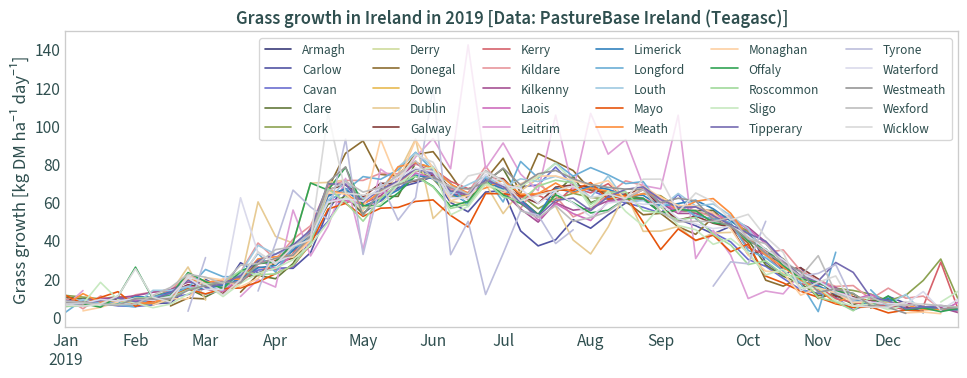

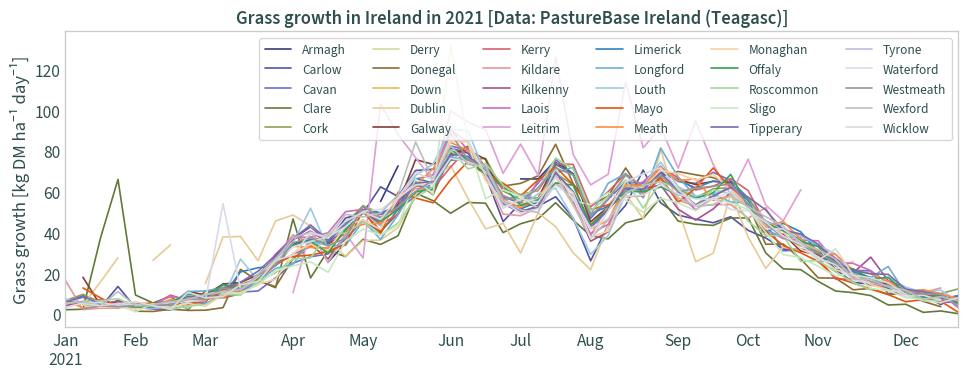

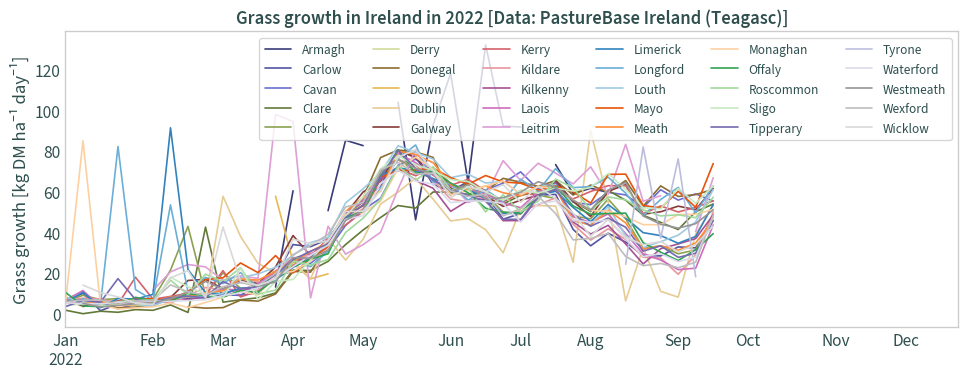

In [30]:
years = list(grass_ts.index.year.unique())
for y in years:
    if y > 2012:
        grass_ts.loc[str(y)].plot(
            figsize=(12, 4),
            linewidth=1.25,
            cmap=mcolors.ListedColormap(colors)
        )
        plt.title(
            f"Grass growth in Ireland in {y} "
            "[Data: PastureBase Ireland (Teagasc)]"
        )
        plt.xlabel("")
        plt.ylabel("Grass growth [kg DM ha⁻¹ day⁻¹]")
        plt.legend(ncol=6)
        plt.show()